# KNN 

dataset: IRIS

<img src = "./assets/iris.png" width = 200, height = 200>

In [1]:
import pandas as pd 
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
import seaborn as sn 
from sklearn.metrics import confusion_matrix

# Load Dataset

In [2]:
iris = load_iris()

# Show Information

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Create a DataFrame

In [6]:
df = pd.DataFrame(iris.data, columns =  iris.feature_names)
df["target"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
# Add the text of the class to the dataframe
df["flower"] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# Plot some data

In [8]:
# Create 3x dataframes (each for each flower type)
df_setosa = df[:50]
df_versicolor = df[50:100]
df_virginica = df[100:150]

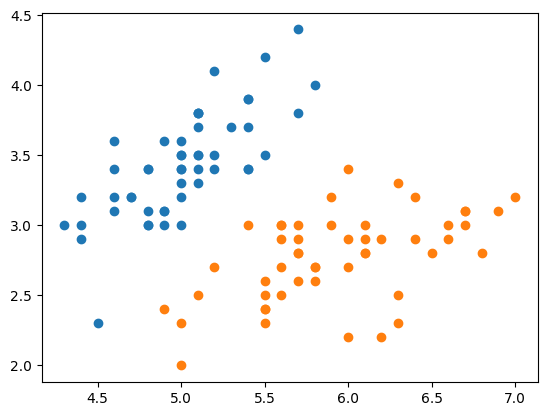

In [10]:
plt.scatter(df_setosa["sepal length (cm)"], df_setosa["sepal width (cm)"])
plt.scatter(df_versicolor["sepal length (cm)"], df_versicolor["sepal width (cm)"])

# Split the data

In [11]:
# 1. Split inputs and output 
X = df.drop(["target", "flower"], axis = "columns")
y = df.target

In [12]:
# 2. Split in train and test data
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2, random_state= 40)

In [13]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

120
30
120
30


# Build and Train the model

In [16]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Score

In [17]:
model.score(X_test, y_test)

1.0

# Prediction

In [18]:
model.predict([[ 4.3, 3.1, 1.7, 0.4  ]])  # Sepal_len, sepal_widt, ...  -> 0: Setosa

c:\Python\Python3108\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

# Confusion Matrix

In [19]:
y_predicted = model.predict(X_test)

<AxesSubplot: >

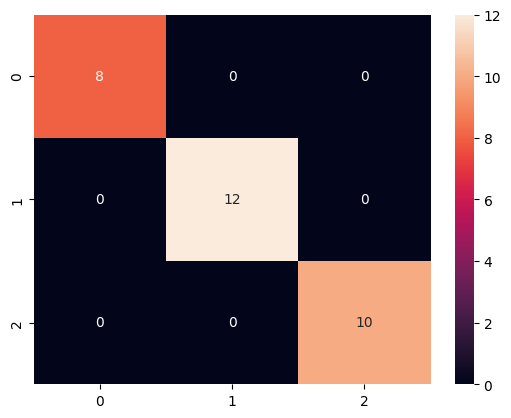

In [20]:
cm = confusion_matrix(y_test, y_predicted)

sn.heatmap(cm, annot = True)